

#**Naive Bayes Classifier**

It is a kind of classifier that works on Bayes theorem. Prediction of membership probabilities is made for every class such as the probability of data points is associated a particular class.




##**Problem Statement**

To classify patients as diabetic or non-diabetic. The dataset has several different medical predictor features and a target that is **Outcome**. Predictor variables include the number of pregnancies that patient had, their BMI, insulin level, age and so on.....

In [1]:
#importing libraries
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
# define columns names
colnames = ['preg','plas','pres','skin','test','mass','pedi','age','class']
pimadf = pd.read_csv("datasets/pima-indians-diabetes.data", names=colnames)
pimadf.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
std = StandardScaler()

In [4]:
X = pimadf.drop('class',axis=1)
Y = pimadf['class']

X = std.fit_transform(X)

In [5]:
#spliting data stes
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=7)

In [6]:
#model
model = GaussianNB()

In [7]:
#fitting the model
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

In [8]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

ms = model.score(X_test,Y_test)
ms

0.7402597402597403

In [9]:
metrics.confusion_matrix(y_pred,Y_test)

array([[116,  29],
       [ 31,  55]])

In [10]:
#find probability
y_pred_prob = model.predict_proba(X_test)

In [11]:
#area under the curve
from sklearn.metrics import auc, roc_curve

fpr,tpr,thresholds = roc_curve(Y_test, y_pred_prob[::,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.7973760932944606

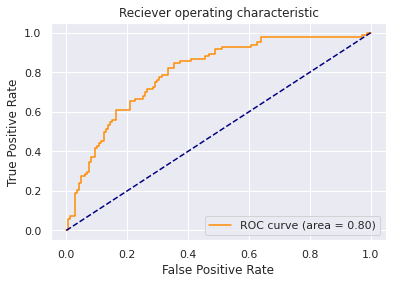

In [12]:
#plot roc curve
plt.plot(fpr,tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', linestyle='--')

#x and y labelling
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#title and legend
plt.title('Reciever operating characteristic')
plt.legend(loc='lower right')
plt.show()